In [1]:
import numpy as np
import gc

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import (
    Dense,
    Flatten,
    Conv2D,
    MaxPooling2D,
    Dropout,
    Input,
    BatchNormalization,
    Concatenate,
    GlobalAveragePooling2D,
    Conv2DTranspose,
    concatenate,
)

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import Sequence, plot_model

from tensorflow.keras.preprocessing.image import (
    load_img,
    img_to_array,
    ImageDataGenerator,
)

from tensorflow.keras.datasets import mnist
import tensorflow_datasets as tfds
import tensorflow as tf
import tensorflow_addons as tfa

import pandas as pd
import matplotlib.pyplot as plt

import os

from sklearn.metrics import jaccard_score
from sklearn.model_selection import train_test_split

import cv2

from PIL import Image

from glob import glob
from pathlib import Path
from typing import Generator

2025-05-13 19:55:50.586475: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-13 19:55:50.586577: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-13 19:55:50.586598: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-13 19:55:50.760651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/marroj/miniconda3/envs/dee

In [2]:
def load_data(path: str = "dataset") -> Generator[np.array, float, float]:
    csv_path = f"{path}/*.csv"
    csvs = glob(csv_path)
    for csv_path in csvs:
        #print(f"Loading {csv_path}")
        csv_data = pd.read_csv(csv_path, header=None)
        csv_data.columns = ["id", "forward", "left"]
        images = glob(f"{csv_path.removesuffix('.csv')}/*.jpg")
        for image_path in images:
            #image_data = cv2.imread(image_path)
            image_number = int(Path(image_path).name.removesuffix(".jpg"))
            row = csv_data[csv_data["id"]==image_number]
            yield row, row["forward"].values[0], row["left"].values[0]

In [ ]:
def load_data_preprocess(path, image_size, batch_size):
    def preprocess(image):
        ...
    data_loader = load_data(path)
    data = []
    labels = []
    
    for image, forward, left in data_loader:
        image = cv2.resize(image, (image_size, image_size))
        image = preprocess(image)
        data.append(image)
        labels.append([forward, left])
        

In [ ]:
def build_embedding_predictor(input_shape):
    x = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    x = MaxPooling2D((2, 2))(x)
    
    

# Deviation

In [3]:
import matplotlib.pyplot as plt

In [10]:
forward = []
turn = []

for image, forward_value, turn_value in load_data("dataset"):
    forward.append(forward_value)
    turn.append(turn_value)

turn = [abs(turn_value) for turn_value in turn]

to_remove = []

for i in range(len(forward)):
    if turn[i] == 0 or turn[i] == 1:
        to_remove.append(i)

forward = np.delete(forward, to_remove)
turn = np.delete(turn, to_remove)

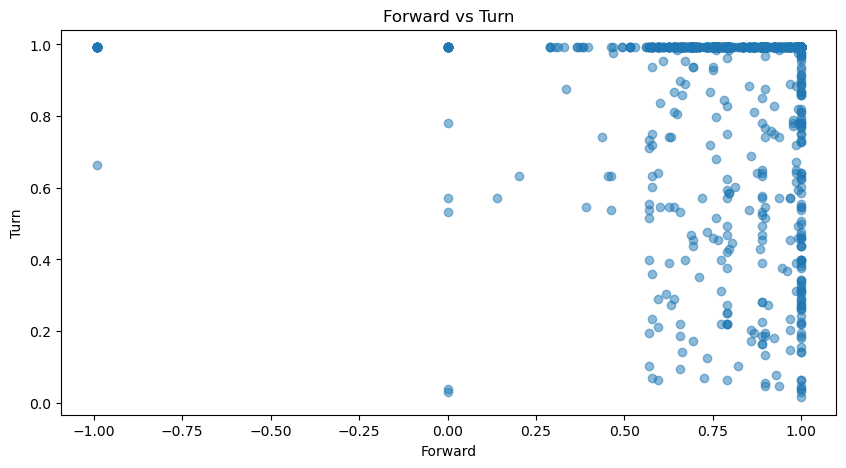

In [11]:
# plot forward and turn values
plt.figure(figsize=(10, 5))
plt.scatter(forward, turn, alpha=0.5)
plt.title("Forward vs Turn")
plt.xlabel("Forward")
plt.ylabel("Turn")
plt.show()